In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
import string
from matplotlib.pyplot import figure
import pandas as pd

In [3]:
cancer_df=pd.read_csv(r'C:\Users\pad39\Downloads\sobar-72.csv')
cancer_df.head(2)

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1


In [24]:
cancer_df.shape

(72, 20)

In [7]:
km3 = KMeans(n_clusters=3)

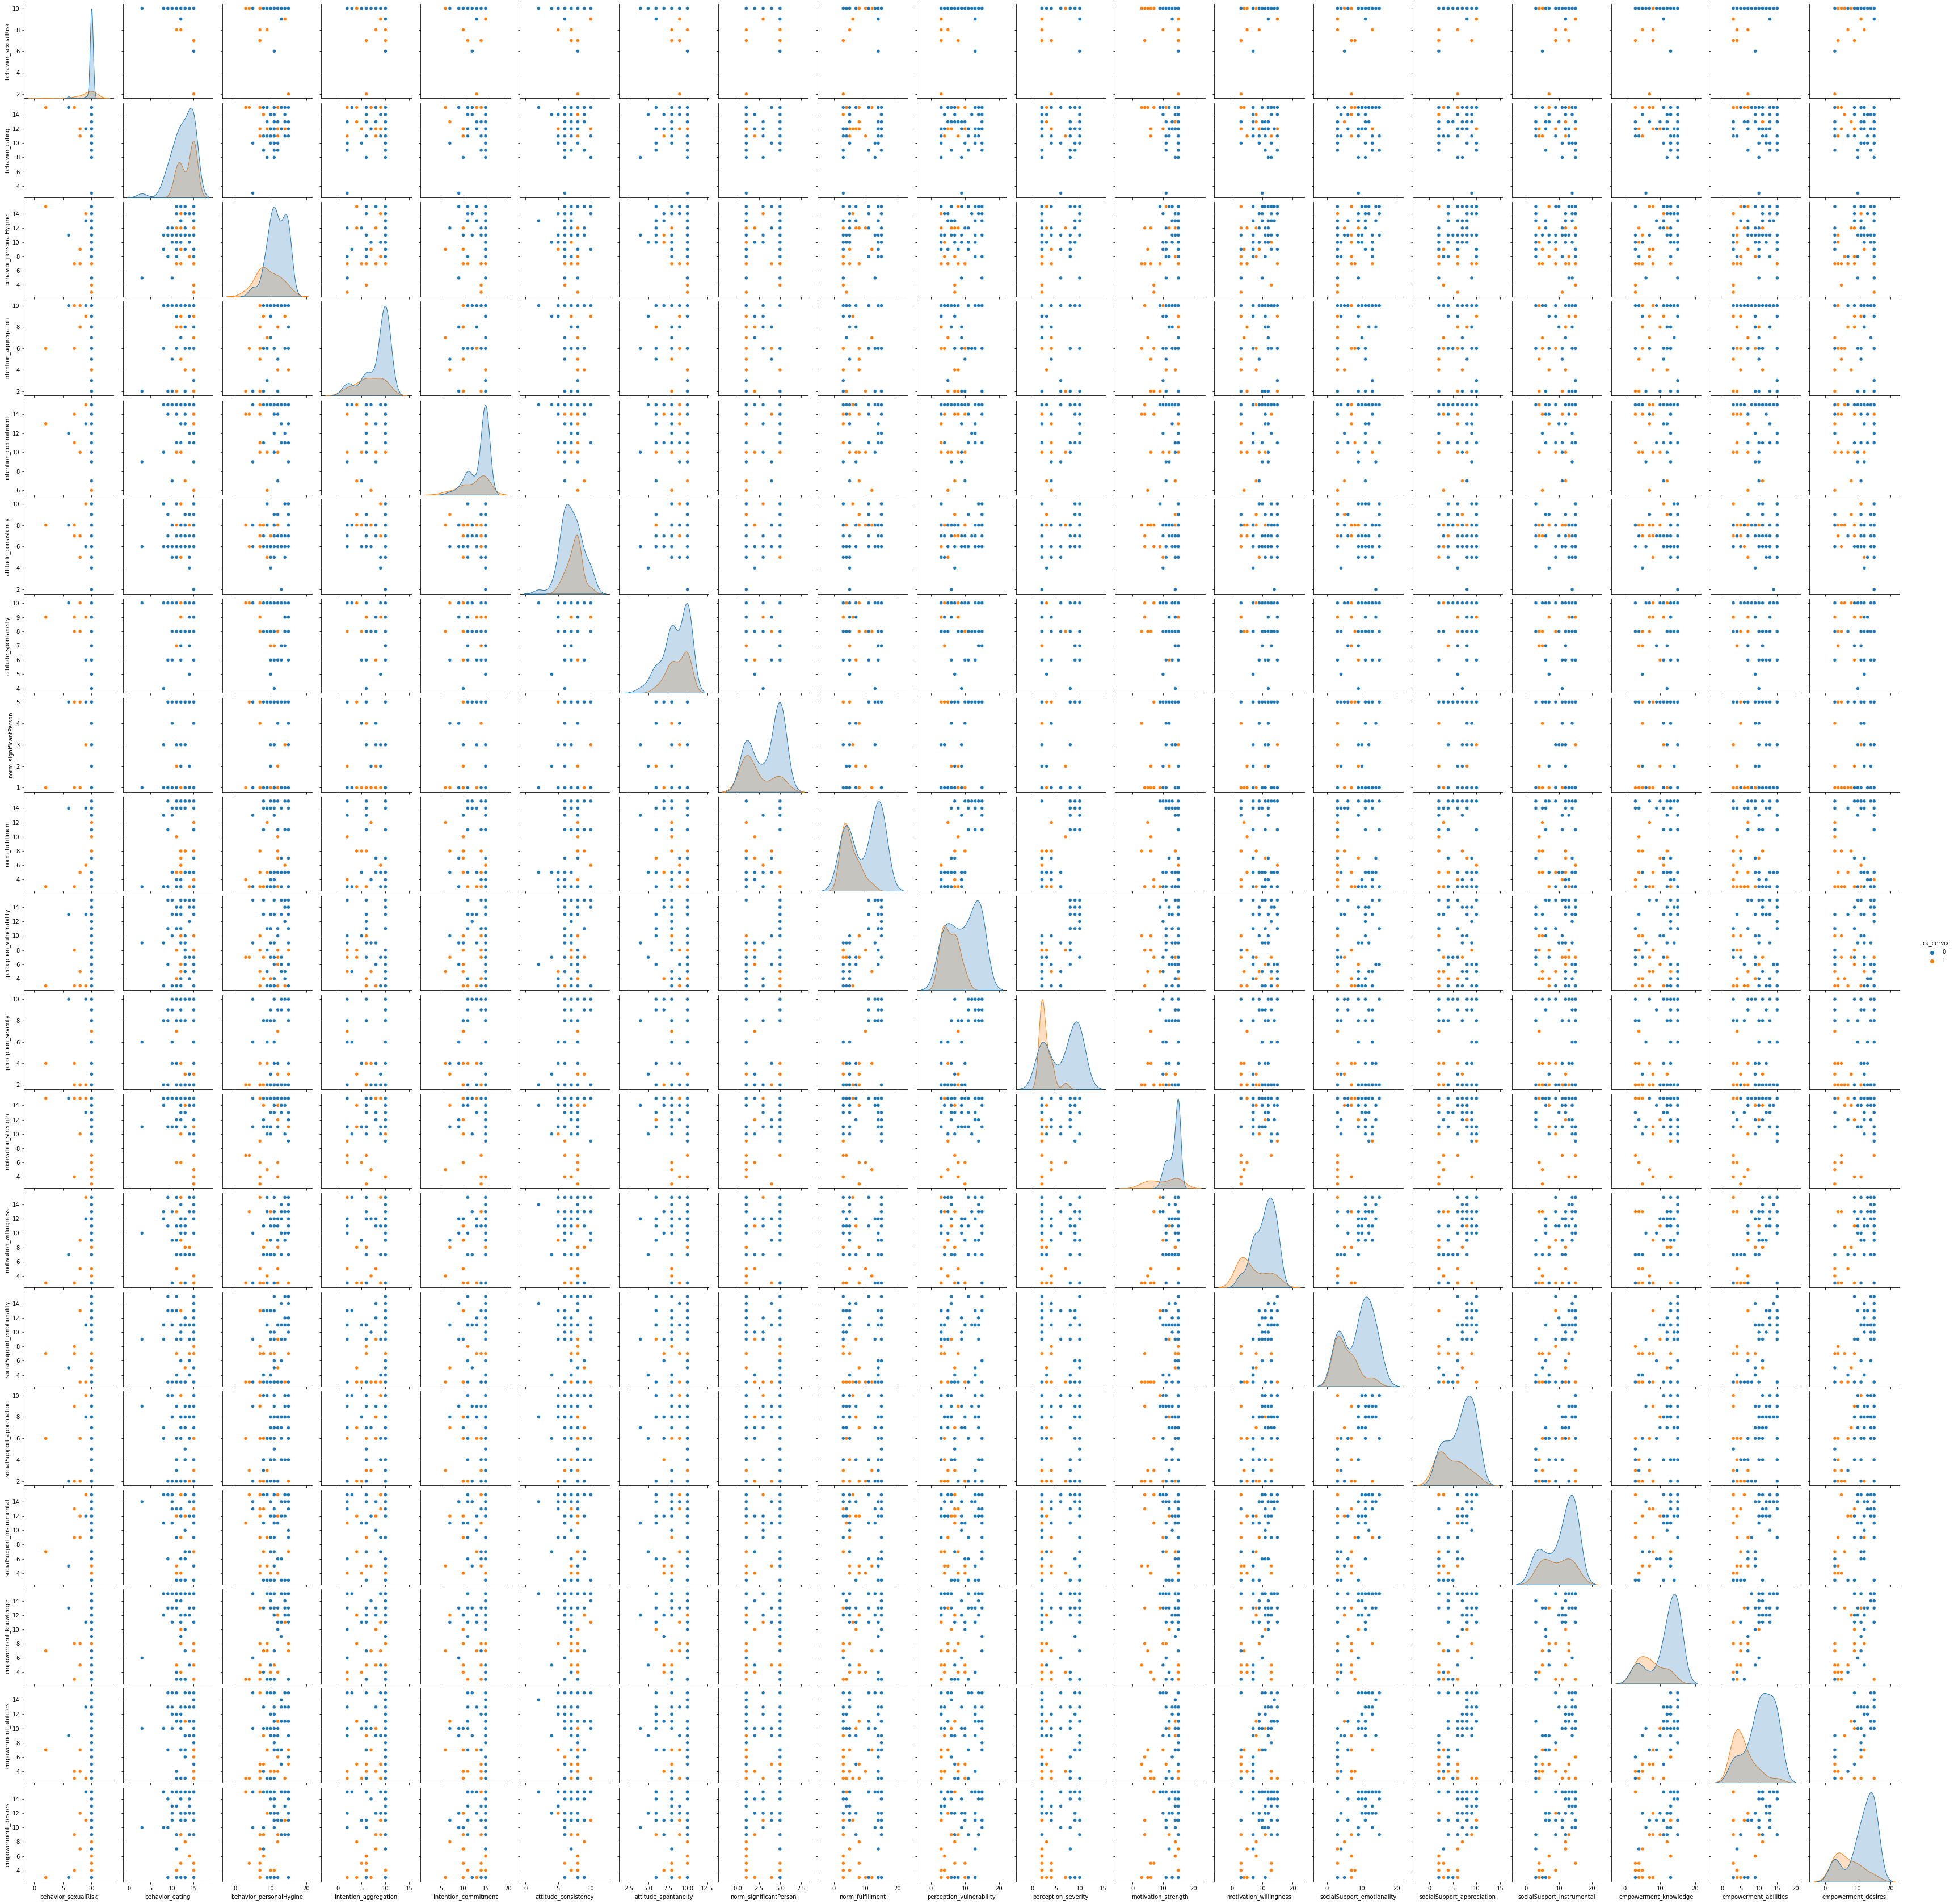

In [4]:
# This data set has a lot of features so the pairplot was massive but over many features this data set does seem to have 
# clusters around the upper right part of the graph and the lower half. 
sns.pairplot(data =cancer_df,hue='ca_cervix')

In [5]:
cancer_x=cancer_df.values[:,0:19]

In [8]:
cancer_cluster=km3.fit_predict(cancer_x)

In [9]:
km3.labels_

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2])

In [7]:
km3.cluster_centers_

array([[ 9.25925926, 13.2962963 ,  9.66666667,  7.55555556, 13.51851852,
         7.33333333,  8.62962963,  3.11111111,  8.11111111,  7.51851852,
         4.81481481, 11.11111111,  5.96296296,  4.07407407,  3.66666667,
         6.74074074,  6.18518519,  5.        ,  5.7037037 ],
       [ 9.875     , 12.16666667, 11.41666667,  8.125     , 13.125     ,
         6.75      ,  8.79166667,  1.91666667,  4.33333333,  5.20833333,
         2.79166667, 13.25      , 11.79166667, 10.875     ,  8.08333333,
        13.125     , 12.95833333, 11.70833333, 13.04166667],
       [ 9.95238095, 12.85714286, 12.52380952,  8.0952381 , 13.38095238,
         7.47619048,  8.38095238,  4.52380952, 13.71428571, 13.57142857,
         9.0952381 , 13.95238095, 12.0952381 , 10.0952381 ,  7.19047619,
        11.9047619 , 13.38095238, 12.14285714, 13.        ]])

In [8]:
metrics.silhouette_score(cancer_x, km3.labels_)

0.27040195407607975

The sillhouette score measures how similar an object is to its cluster versus other clusters or the mean difference between clusters. The metric rages between -1 and 1 with 1 being a better score because this sillhouette score is .27 it is safe to day that the objects are more similar to their assigned clusters than to nieghboring clusters.

In [44]:
cancer_y=cancer_df.values[:,19]

In [45]:
# the adjusted rand index a measure of simularity between two clusters
metrics.adjusted_rand_score(cancer_y,km3.labels_)

0.10502178279811131

In [48]:
# measures the mutual information between two clusters in a dataset
metrics.adjusted_mutual_info_score(cancer_y,km3.labels_)

0.18192998033077865

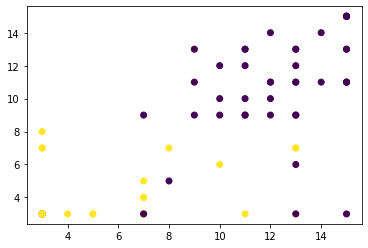

In [25]:
# here is a scatter plot of the features 'motivation_willingness' and 'motivation_strength' these variables seem to have very strong
# clusters on opposite coners of the graph
plt.scatter(cancer_x[:,12],cancer_x[:,13],c=km2.labels_)

In [10]:
km4 = KMeans(n_clusters=4)

In [11]:
cancer_cluster=km4.fit_predict(cancer_x)

In [12]:
# 4 was the second worst score
metrics.silhouette_score(cancer_x, km4.labels_)

0.2621310740050142

In [13]:
km5 = KMeans(n_clusters=5)

In [14]:
cancer_cluster=km5.fit_predict(cancer_x)

In [15]:
# km5 had the worst score for any value of k this is mostlyly because there are not 5 clusters
metrics.silhouette_score(cancer_x, km5.labels_)

0.2535146901240341

In [47]:
# This score was better than I expected
metrics.adjusted_rand_score(cancer_y,km5.labels_)

0.15146140784892653

In [50]:
metrics.adjusted_mutual_info_score(cancer_y,km5.labels_)

0.23894122800500917

In [18]:
km2 = KMeans(n_clusters=2)

In [17]:
cancer_cluster=km2.fit_predict(cancer_x)

In [18]:
# km2 had the best silhouette score which makes sense considering this data set only has two target features
metrics.silhouette_score(cancer_x, km2.labels_)

0.28012497988495466

In [46]:
# I wanted to see the adjusted rand index for k=2 and the score was much higher
metrics.adjusted_rand_score(cancer_y,km2.labels_)

0.2961391435194149

In [49]:
# The mutual info score was okay for km2 meaning the data does have some influence over the labels
metrics.adjusted_mutual_info_score(cancer_y,km2.labels_)

0.21922782758077863

In [19]:
# km3 was close to km2 but slightly lower so three clusters was not the optimal balue for k
metrics.silhouette_score(cancer_x, km3.labels_)

0.27040195407607975

Overall it seems that 2 was the best value for k and after increasing k up until five the accuracy of the model diminished every time

In [21]:
cancer_x[:,:]

array([[10, 13, 12, ..., 12, 11,  8],
       [10, 11, 11, ...,  5,  4,  4],
       [10, 15,  3, ...,  3,  3, 15],
       ...,
       [10,  8, 11, ..., 12, 10, 10],
       [ 9, 12, 13, ..., 11, 13, 15],
       [10, 14, 14, ..., 13, 15, 15]], dtype=int64)

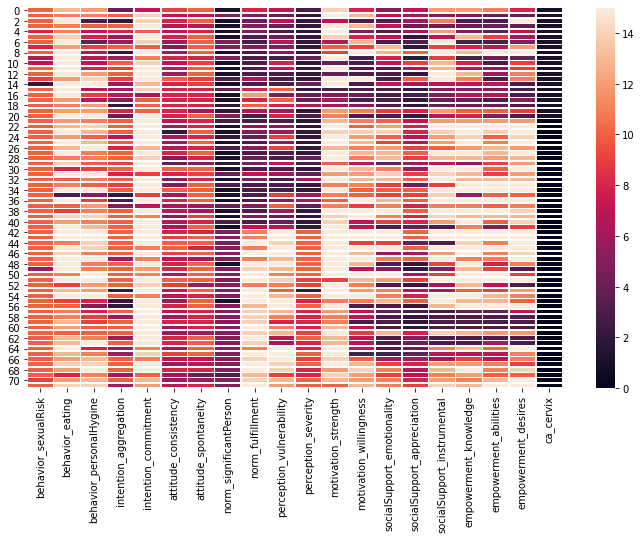

In [39]:
#I employed a heat map of the data to try and get a better look at what variables likely played an important part in this model
hm=plt.subplots(figsize=(12, 7))
hm=sns.heatmap(cancer_df, linewidths=.5)

The heat map is interesting to me because it shouws which variables seem to have the most varaition in their values and therefore which varaibles would be the most influential on the labels for the data set.

In [15]:
cancer_x=cancer_df.values[:,9:19]

In [19]:
# we will go with km2 because this preformed the best
cancer_cluster=km2.fit_predict(cancer_x)

In [20]:
# the score was much beter than any other model
metrics.silhouette_score(cancer_x, km2.labels_)

0.36884329956127015

I'll use km3 as well

In [22]:
cancer_cluster=km3.fit_predict(cancer_x)

In [23]:
# This score is also better than the origional km3
metrics.silhouette_score(cancer_x, km3.labels_)

0.30189823801112714